## Apply PCA and LDA to reduce the dimensionality of the wdbc data set to two dimensions and show the data distribution in the reduced space.

In [ ]:
#在intel處理器上加速sklearn(要先patch才import sklearn的其他東西)
#安裝: pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()

In [ ]:
import sklearn.datasets as ds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import fetch_openml
import warnings
# warnings.filterwarnings("ignore")  # to ignore warnings

In [ ]:

# fetch the wdbc data set from openML
X, ds_y = fetch_openml('wdbc', version=1, return_X_y=True)

if not isinstance(X,np.ndarray):  # 如果不是numpy array，就轉換為numpy array
    X = X.to_numpy().astype(float)
    ds_y = ds_y.to_numpy()

y = np.zeros((X.shape[0],),dtype=int) # 建立一個y的陣列，長度為X的長度，全部填0
label_set = np.unique(ds_y) # 取得資料集中各個label

#dataset中的label原來是1 2
#把label變成 0 1
for i,c_label in enumerate(label_set):
    y[np.nonzero(ds_y==c_label)] = i

# X is the data matrix and y is the label

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('PCA')
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
# your code

# apply LDA
plt.subplot(1,2,2)
plt.title('LDA')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X,ds_y)
plt.scatter(X_lda[:,0],[0]*len(X_lda),c=y)

# your code

plt.tight_layout()
plt.savefig('ex9.png',dpi=300)
plt.show()

## apply k-means and hierarchical clustering with ward linkage to cluster the data points in the wdbc data set (ignore the class label) into two clusters. Evaluate and report the clustering accuracy measured by mutual_info_score, adjusted_mutual_info_score and normalized_mutual_info_score.

kmeans_mutual_info_score: 0.2788454615572362
ward_mutual_info_score: 0.17310220272251137
kmeans_adjusted_mutual_info_score: 0.46400471284520867
ward_adjusted_mutual_info_score: 0.3179697850592938
kmeans_normalized_mutual_info_score: 0.46479332792160793
ward_normalized_mutual_info_score: 0.31908185424236946


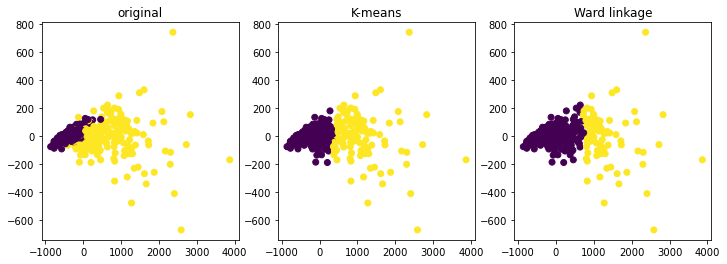

In [2]:
kmeans = KMeans(n_clusters=2, random_state=0)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('original')
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)

#kmeans
predict_kmeans = kmeans.fit_predict(X)

plt.subplot(1,3,2)
plt.title('K-means')
plt.scatter(X_pca[:,0],X_pca[:,1],c=predict_kmeans)

#hierarchical clustering with ward linkage
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
predict_ward = ward.fit_predict(X)
plt.subplot(1,3,3)
plt.title('Ward linkage')
plt.scatter(X_pca[:,0],X_pca[:,1],c=predict_ward)

##mutual_info_score
from sklearn.metrics import mutual_info_score
kmeans_mutual_info_score = mutual_info_score(y,predict_kmeans)
ward_mutual_info_score = mutual_info_score(y,predict_ward)
print('kmeans_mutual_info_score:',kmeans_mutual_info_score)
print('ward_mutual_info_score:',ward_mutual_info_score)

#adjusted_mutual_info_score
from sklearn.metrics import adjusted_mutual_info_score
kmeans_adjusted_mutual_info_score = adjusted_mutual_info_score(y,predict_kmeans)
ward_adjusted_mutual_info_score = adjusted_mutual_info_score(y,predict_ward)
print('kmeans_adjusted_mutual_info_score:',kmeans_adjusted_mutual_info_score)
print('ward_adjusted_mutual_info_score:',ward_adjusted_mutual_info_score)

#normalized_mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
kmeans_normalized_mutual_info_score = normalized_mutual_info_score(y,predict_kmeans)
ward_normalized_mutual_info_score = normalized_mutual_info_score(y,predict_ward)
print('kmeans_normalized_mutual_info_score:',kmeans_normalized_mutual_info_score)
print('ward_normalized_mutual_info_score:',ward_normalized_mutual_info_score)



## Apply t-SNE to embed the MNIST dataset (ignore the class label) into a two-dimensional space.

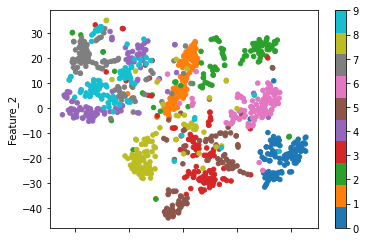

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
warnings.simplefilter(action='ignore', category=FutureWarning)

(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

sample_id = []
y         = []

##每個class取前100個sample
for i in range(10):
    #取出每個class的sample
    p = np.argwhere(y_train==i).ravel()[:100] #取前100個
    sample_id.extend(p) ##feature
    y.extend([i]*100)  ##label

X = np.reshape(x_train[sample_id],(-1,784))  #28*28變成1*784
y = np.array(y)

# apply t-SNE to embed the row vector of X into a 2-dimensional space
tsne = TSNE(n_components=2, random_state=0) #呼叫TSNE，設定要轉換成2維
X_tsne = tsne.fit_transform(X)  #將X轉換成2維
#畫圖
# plt.figure(figsize=(8,8))
# plt.subplot(1,1,1)
# plt.title('tsne')
# plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y, cmap='tab10')

##其他畫圖方式
df = pd.DataFrame(X_tsne,columns=['Feature_1','Feature_2'])
df.plot.scatter(x='Feature_1',y='Feature_2',c=y,cmap='tab10')
plt.show()




1.PCA
2.LDA
3.MDS
4.LLE
5.DBSCAN
6.k-means
7.spectral clustering
8.single linkage


